# <center><ins>Chum Salmon: Introduction and Exploration</ins></center>

<center>February 28 -- March 3, 2023; Sitka, Alaska</center>

<center>Dr. Elizabeth Fischer, PhD<br/>
University of Alaska, Fairbanks<br/>
eafischer2@alaska.edu  617-308-0436</center>

The purpose of this notebook and associated data is to catalyze exploration and understanding of the relationship between Pacific salmon species and climate in Alaska.

Please see the associated Google Doc for background and setup instructions:

https://docs.google.com/document/d/1Tkyv02KSmc91ZcNqsUUmeuBzp-LjQsJU5lQf-rOel30/edit


# 0. Getting Started

There's always some boilerplat at the beginning of a Jupyter notbeook.  Don't worry too much about it, just run each cell; either by pressing the "play" icon or by typing Shift-Enter.

In [37]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
# Connect to data & code
import google.colab
google.colab.drive.mount("/content/drive", force_remount=True)

import sys
sys.path.append('/content/drive/MyDrive/sitka_harness/uafgi')
sys.path.append('/content/drive/MyDrive/sitka_harness/sitka_salmon')

from importlib import reload

Mounted at /content/drive


In [39]:
import pandas as pd
from sitka_salmon import d_era5, d_ruggerone, d_pdo

import matplotlib
import matplotlib.pyplot as plt
import IPython.display
IPython.display.display(IPython.display.HTML("<style>.container {width:100% !important;</style>"))

In [40]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 50)  # or 1000
pd.set_option('display.max_colwidth', 200)  # or 199
matplotlib.rcParams['figure.figsize'] = [7, 7]  # (width, height) in Inches

===========================================================================================================

# 1. LOAD DATA

Now we can start the fun part!  Let's load our three datasets, then we can play around with them togther:

1. Salmon abundance / biomass.  (Three species: pink / chum / sockeye)
2. Climate variables in oceanic salmon habitat.  (Sea surface temperatures, ice thickness, ice extent).
3. The Pacific Decadal Oscillation

********************************
# 1a. Salmon Data

Data on Pacific salmon abundance are available from the [paper](https://drive.google.com/file/d/15fExP7vf43PrUmIvjJ4mKLPHGJDwAI4A/view):


> Ruggerone, Gregory T., and James R. Irvine. "Numbers and biomass of natural‐and hatchery‐origin pink salmon, chum salmon, and sockeye salmon in the north Pacific Ocean, 1925–2015." *Marine and Coastal Fisheries* 10, no. 2 (2018): 152-168.

These data are loaded using one of the following:
```
d_ruggerone.get('natural', 'mature', 'abundance', <species>)
d_ruggerone.get('hatchery', 'mature', 'abundance', <species>)
d_ruggerone.get('*', 'mature', 'abundance', <species>)
d_ruggerone.get('*', 'mature', 'biomass', <species>)
d_ruggerone.get('*', '*', 'biomass', <species>)
```

In place of `<species>`, use one of either:
* `'pink'`: Pink Salmon
* `'chum'`: Chum Salmon
* `'sockeye'`: Sockeye Salmon


In [41]:
salmon_table = d_ruggerone.get('*', 'mature', 'biomass', 'chum')
#salmon_table = d_ruggerone.get('*', 'mature', 'abundance', 'chum')
print('Loaded Salmon Dataset')
print('=====================')
print(f'Title: {salmon_table.title}')
print(f'Species: {salmon_table.species}')
print(f'Description: {salmon_table.description}')
salmon = salmon_table.df
salmon

Loaded Salmon Dataset
Title: Total Chum Salmon adult biomass
Species: chum
Description: Supplementary Table 14. Biomass (catch and escapement in metric ton) of total  Chum Salmon returning to regions of Asia and North America, 1952-2015.


,Korea,Japan,M&I,WKam,EKam,WAK,SPen,Kod,CI,PWS,SEAK,NBC,SBC,WA,TOTAL
Year,,,,,,,,,,,,,,,
1952,0.000000,7790.948877,71350.382780,13858.732110,13438.269825,15065.624216,6166.417150,6039.673979,4397.887629,2910.328304,28378.816288,12416.489340,15724.952349,8614.267152,206152.789999
1953,0.000000,7724.781378,72326.244036,13764.342850,7425.285853,15581.856231,7934.946019,3180.463311,5041.798130,2130.316947,25040.342388,18884.393806,16203.266091,5081.383829,200319.420870
1954,0.000000,12949.687026,104637.579293,27773.024794,12981.957878,16793.564128,7416.478599,6069.238662,6754.534542,2437.062596,28715.381782,22232.071279,21313.209490,7236.382828,277310.172897
1955,0.000000,9532.541536,143514.967016,39354.544727,26871.349987,14248.491837,5445.127270,2889.366254,3357.113252,2437.062596,13646.563141,6594.703450,8767.511062,4446.565154,281105.907283
1956,0.000000,6559.083688,165402.646820,26525.499271,26325.209385,16724.891674,8711.341136,3862.235957,7409.147135,2743.808245,20471.739849,12167.484123,8415.385080,2792.485862,308110.958225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,130.508049,132678.771975,102784.057075,18851.795330,12126.658563,34121.285596,7970.076086,4352.092170,2198.985444,8352.000654,44350.525732,9328.807274,32969.844025,5941.524527,416156.932501
2012,102.006142,124028.247458,119701.736226,23026.185055,16661.772625,37332.552902,4525.400514,4141.036064,2779.261828,15679.740021,58421.708304,9631.391523,19205.970255,7120.839163,442357.848080
2013,97.666684,155698.505420,128298.055489,19832.403247,23370.949808,36950.821980,8363.378146,4209.684315,2273.394669,14767.767516,53145.445790,9238.465355,15714.964683,9059.377595,481020.880697


Columns are as follows; see the [Google Doc](https://docs.google.com/document/d/1Tkyv02KSmc91ZcNqsUUmeuBzp-LjQsJU5lQf-rOel30) for more info.
```
Abbr.   Regional Name
-----   --------------
Japan   Japan & South Korea
M&I     Russia: Mainland & Islands
WKam    Western Kamchatka
EKam    Eastern Kamchatka
WAK     Western Alaska
SPen    Southern Alaska Peninsula
Kod     Kodiak
CI      Cook Inlet
PWS     Prince William Sound
SEAK    Southeast Alaska
NBC     Northern British Columbia
SBC     Southern British Columbia
WA      Washington State
WC      West Coast USA
```

****************************************
# 1b. Climate Data

Now it's time to read the climate data.  We believe that sea surface temperatures have the biggest effect on salmon abundance: in general, warmer waters allow the salmon to grow faster in their feeding grounds in the Gulf of Alaska and East Bering Sea.  But maybe ice thickness and fractional ice cover also matter.

`d_era5.var()` reads an ocean variable from the ERA5 climate reanalysis.
Available variables are:
* `'sosstsst'`: Sea surface Temperature [degC]
* `'iicethic'`: Ice thickness [m]
* `'ileadfra'`: Fractional ice cover

Variables are summarized by *Large Marine Ecosystem* (LME) -- for example, `'Gulf of Alaska'` or `'East Bering Sea'`.


**More Information**
* **Large Marine Ecosystems:** https://www.lmehub.net

* **ERA5 Variables:** https://www.ecmwf.int/en/research/climate-reanalysis/ocean-reanalysis

Let's start out by reading just sea surface temperature (`sosstsst`).

In [42]:
climate=d_era5.get('sosstsst', 'summer')
climate

,Baltic Sea,Sea of Okhotsk,North Sea,Gulf of Alaska,Labrador - Newfoundland,Celtic-Biscay Shelf,Sea of Japan,Oyashio Current,Scotian Shelf,California Current,Black Sea,Northeast U.S. Continental Shelf,Mediterranean Sea,Iberian Coastal,Kuroshio Current,Yellow Sea,Canary Current,East China Sea,Southeast U.S. Continental Shelf,Gulf of California,Gulf of Mexico,Arabian Sea,Red Sea,Insular Pacific-Hawaiian,Caribbean Sea,South China Sea,Bay of Bengal,Pacific Central-American Coastal,Sulu-Celebes Sea,Gulf of Thailand,North Brazil Shelf,Guinea Current,Somali Coastal Current,Indonesian Sea,East Brazil Shelf,Humboldt Current,Benguela Current,North Australian Shelf,Northeast Australian Shelf,Agulhas Current,Northwest Australian Shelf,East Central Australian Shelf,South Brazil Shelf,New Zealand Shelf,Patagonian Shelf,Southeast Australian Shelf,Antarctica,South West Australian Shelf,West Central Australian Shelf,Faroe Plateau,Iceland Shelf and Sea,Greenland Sea,Norwegian Sea,Barents Sea,Kara Sea,Laptev Sea,East Siberian Sea,West Bering Sea,Aleutian Islands,East Bering Sea,Canadian Eastern Arctic - West Greenland,Hudson Bay Complex,Beaufort Sea,Canadian High Arctic - North Greenland,Central Arctic,Northern Bering - Chukchi Seas
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1959,14.434996,8.212000,13.909353,11.940824,8.230099,15.723473,18.824708,11.449105,12.746280,19.008321,19.644204,17.175122,23.345055,18.899545,25.621959,23.139324,22.404522,26.209369,27.859023,25.589432,28.521055,27.786168,28.268475,26.568153,27.696845,28.888726,28.377083,27.891804,27.873319,28.707638,27.266515,25.903402,25.365743,26.721168,26.023060,14.263993,18.270782,25.572323,23.732206,23.185144,26.104967,20.361942,19.449623,12.908082,7.774662,13.406748,-1.408508,15.880774,21.202218,11.072155,6.543580,1.338693,8.970006,3.336563,-0.976168,-0.933367,-1.209258,8.282957,8.591117,7.693242,0.857223,1.175888,-0.823393,-1.536843,-1.610005,1.324684
1960,13.609313,8.187100,13.411168,11.733706,9.409265,15.448113,18.376329,10.976940,14.345284,18.341934,19.131987,17.774089,23.648453,18.887259,25.704961,22.284316,22.673591,26.187284,28.021718,24.155115,28.746430,27.807319,28.299999,26.586286,28.152778,28.676828,28.406829,27.260213,27.916503,28.577531,27.449979,25.998996,25.433338,26.967231,25.920484,14.299201,18.710214,25.852153,24.179390,22.921817,25.832332,20.171769,19.255853,13.369313,8.102355,12.754892,-1.411069,14.948644,20.339746,11.679536,7.860604,2.317203,10.008722,3.876059,-1.114027,-0.864087,-1.208528,7.942318,8.205327,7.910289,1.643505,1.738399,-0.937092,-1.506169,-1.597849,1.543059
1961,13.371190,8.090307,12.939732,12.321283,8.945354,15.098687,18.904351,11.466098,12.845746,18.362982,19.764247,16.585889,23.517445,18.692292,26.271479,23.486775,23.302698,26.760720,27.884520,24.684989,28.501458,27.672240,28.156876,26.174419,27.776542,28.327234,27.982012,27.518373,27.527398,28.250465,27.252057,25.660430,25.786375,26.496349,25.758258,14.333625,18.670571,25.598029,23.965186,23.385823,25.670212,19.976820,19.917801,13.125620,7.602484,13.343585,-1.409485,15.566148,20.551093,11.077111,7.114177,1.908011,9.535258,3.849694,-0.686193,-0.910199,-1.189536,7.707960,7.778266,7.342363,1.719381,0.922964,-0.706686,-1.533394,-1.606866,1.491173
1962,11.923827,8.065716,11.910304,11.906592,7.755815,14.601211,18.033371,10.895902,12.275849,17.632534,19.191153,17.178860,23.521980,18.627898,25.691079,22.388391,22.811120,26.074635,28.010759,24.548840,28.983047,27.720093,28.286862,26.335158,28.007266,28.517010,28.170720,27.312497,27.715104,28.267499,27.490631,25.744768,25.489811,26.879320,25.717661,14.126647,18.666411,25.867007,24.168903,23.086621,25.957774,20.116563,18.519941,13.632830,8.728594,13.075625,-1.407730,15.811284,21.034028,10.797855,6.310682,1.417852,8.688262,2.978578,-0.504935,-0.670138,-0.924188,8.234454,8.572606,7.688337,1.504769,1.109030,-0.797272,-1.523712,-1.625513,1.460741
1963,13.673652,8.145123,13.095501,12.278597,8.201609,14.421841,17.906556,11.015398,12.

****************************************
# 1c. The Pacific Decadal Oscillation (PDO)

Kaeriyama et al (2014; p. 252) mention that Pacific salmon abundance is influenced by the *Pacific Decadal Oscillation*, or changes in the sea surface temperature in the pacific over decades.  This is summarized as a *cliamte index*, available from [NOAA](https://www.ncei.noaa.gov/access/monitoring/pdo/).  According to NOAA:

> When SSTs are anomalously cool in the interior North Pacific and warm along the Pacific Coast, and when sea level pressures are below average over the North Pacific, the PDO has a positive value. When the climate anomaly patterns are reversed, with warm SST anomalies in the interior and cool SST anomalies along the North American coast, or above average sea level pressures over the North Pacific, the PDO has a negative value (Courtesy of Mantua, 1999).

We can read the PDO using `d_pdo.monthly()` or `d_pdo.annual()`.



In [107]:
pdo = d_pdo.annual()
pdo

,pdo
year,
1854,-0.818333
1855,-0.743333
1856,-0.207500
1857,-0.026667
1858,0.196667
...,...
2018,-0.365000
2019,-0.154167
2020,-1.145000


Based on the PDO, Kaeriyama et al (2014; p. 252) designated regimes of more or less salmon production.  Let's get those into a dataframe.  Regimes will be number from 0 to 4.

In [87]:
#                    0     1     2     3     4
regimes_raw = [1800, 1925, 1948, 1977, 1989, 2050]
def d_regimes():
    rows = list()
    regime = 0
    for y0,y1 in zip(regimes_raw[:-1], regimes_raw[1:]):
        for year in range(y0,y1):
            rows.append((year,regime))
        regime += 1
    return pd.DataFrame(rows, columns=('year', 'regime')).set_index('year')

regimes = d_regimes()
regimes

,regime
year,
1800,0
1801,0
1802,0
1803,0
1804,0
...,...
2045,4
2046,4
2047,4


Now we can plot the PDO along with associated Pacific salmon regime changes:

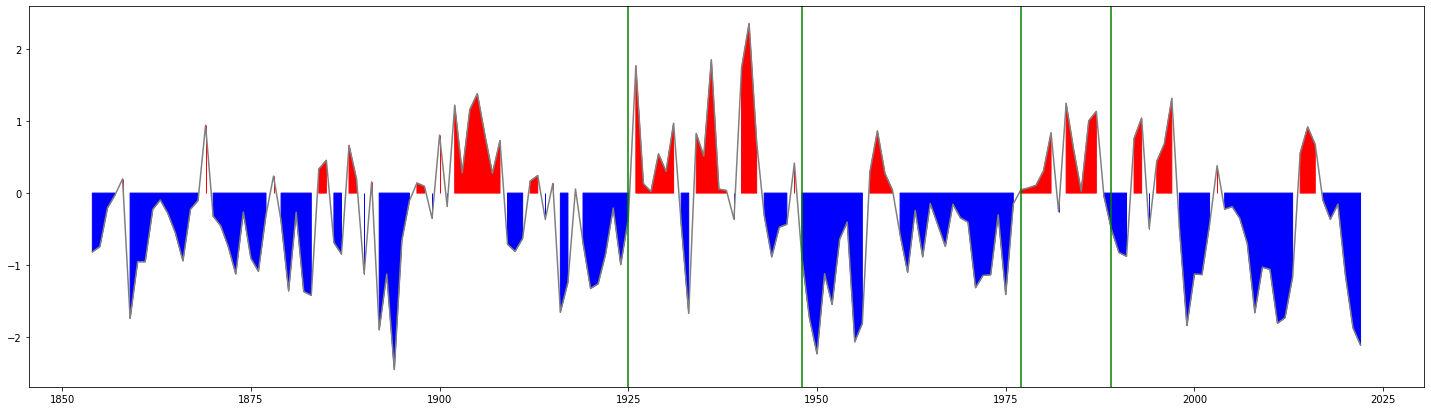

In [92]:
def plot_pdo(pdo):
  pdo['zeros'] = 0
  fig = plt.figure(figsize=(25,7))
  ax = fig.gca()
  ax.plot(pdo.index, pdo.pdo, color='grey')
  ax.fill_between(pdo.index, pdo.zeros, pdo.pdo, where=pdo.zeros<=pdo.pdo, color='r')
  ax.fill_between(pdo.index, pdo.zeros, pdo.pdo, where=pdo.pdo<=pdo.zeros, color='b')

  for year in regimes_raw[1:-1]:
     ax.axvline(x = year, color = 'green', label = 'axvline - full height')

plot_pdo(pdo)


=========================================================================================================
# 2. STATISTICS REVIEW

We want to learn about cause and effect of the environment on salmon.  Our main tool for that will be one of finding *correlations* between variables:

https://en.wikipedia.org/wiki/Correlation

Just remember... **Correlation is Not Causation!!!**

https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation

# Correlation

Let's look at our summer Sea Surface Temperatures for the Gulf of Alaska, East Bering Sea (where our chum salmon like to live in the summers) and Sea of Japan (where Japanese chum salmon might like to live).  What are similarities ad differences between the three?

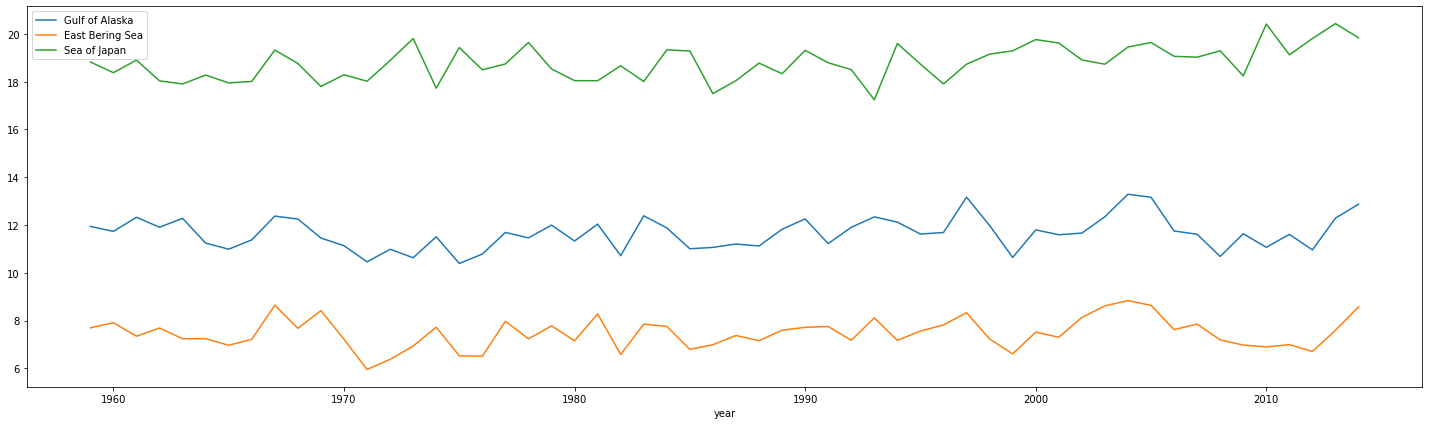

In [10]:
cols = ['Gulf of Alaska', 'East Bering Sea', 'Sea of Japan']
climate[cols].plot(figsize=(25,7))

* The Gulf of Alaska is warmer than the East Bering Sea.  Is this expected or unexpected, based on your intuition of climate?

* Would you say the Gulf of Alaska in the summer is more like the East Bering Sea or the Sea of Japan?

* What about in the winter?

* Let's see how *correlated* they are by looking at a scatter plot.  Correlation is not the same as equal; it means two variables move up and down together.  If it's a warm summer in the Gulf of Alaska, is it also a warm summer in the East Bering Sea?  Why would this be the case?

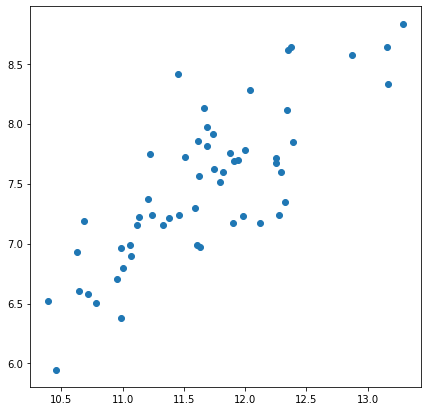

In [11]:
plt.scatter(climate['Gulf of Alaska'], climate['East Bering Sea'])

Now let's look at the Gulf of Alaska vs. something further away, eg. the Sea of Japan.  How is this plot different, and why?  (We say that the temperatures between those two Large Marine Ecosystems are *uncorrelated*).

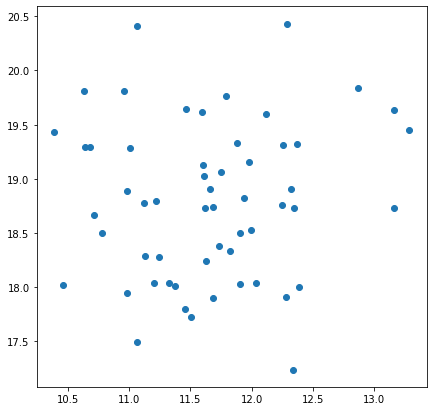

In [12]:
plt.scatter(climate['Gulf of Alaska'], climate['Sea of Japan'])

That's the intuition of correlation.  Instead of looking at a scatter plot, we can instead compute the *correlation coefficient* --- which will be 1 if two variables are completely correlated, and 0 if they are completely independent of each other.  The *correlation matrix* gives us the correlation coefficient for every pair of variables.  Here it is for interesting Large Marine Ecosystems in the Pacific Ocean

* What do we see in this correlation matrix?

In [14]:
climate[['California Current', 'Gulf of Alaska', 'East Bering Sea', 'Aleutian Islands', 'West Bering Sea', 'Sea of Okhotsk', 'Oyashio Current']].corr()

,California Current,Gulf of Alaska,East Bering Sea,Aleutian Islands,West Bering Sea,Sea of Okhotsk,Oyashio Current
California Current,1.000000,0.649547,0.418128,0.397071,0.167636,0.003431,0.146640
Gulf of Alaska,0.649547,1.000000,0.802269,0.610357,0.482892,0.220411,0.100103
East Bering Sea,0.418128,0.802269,1.000000,0.779337,0.560227,0.086190,-0.025149
Aleutian Islands,0.397071,0.610357,0.779337,1.000000,0.623624,-0.021569,0.272898
West Bering Sea,0.167636,0.482892,0.560227,0.623624,1.000000,0.427038,0.372088
Sea of Okhotsk,0.003431,0.220411,0.086190,-0.021569,0.427038,1.000000,0.235988
Oyashio Current,0.146640,0.100103,-0.025149,0.272898,0.372088,0.235988,1.000000


It can be nice to look at the intuitive graph and the numerical correlation, both at once.  Let's make a little tool to do just that, which we can use in the rest of this notebook:

Correlation: 0.08353679546755946


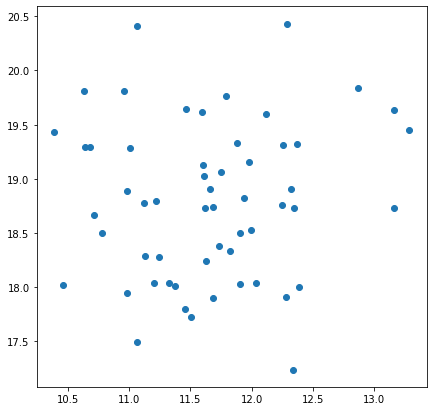

In [29]:
# Make the tool
def plotcorr(col0, col1):

  df = pd.merge(col0, col1, left_index=True, right_index=True)
  plt.scatter(df[col0.name], df[col1.name])
  print('Correlation: {}'.format(df[col0.name].corr(df[col1.name])))

# Use the tool
plotcorr(climate['Gulf of Alaska'], climate['Sea of Japan'])

************************************

# 3. Salmon Populations

Now let's plot our chum salmon data for various parts of Alaska.

* It is already yearly, we don't need to specify summer or winter.  *Why is that?  How were these data collected?*

* Which region has the most salmon?  Why is that?

* What if we looked at salmon counts instead of biomass?  How do things change then?

* What about different species of salmon?



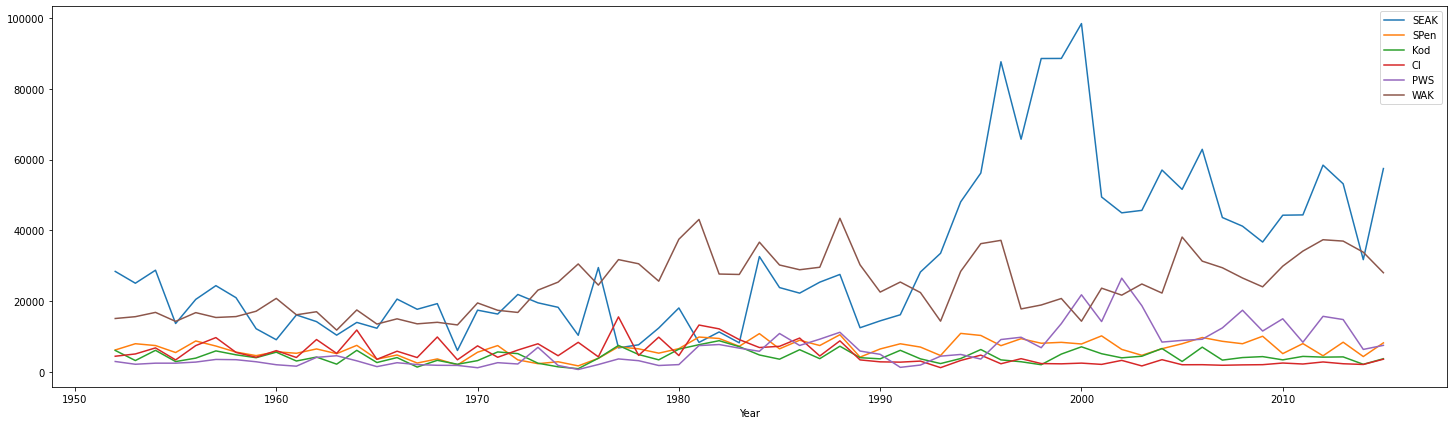

In [16]:
salmon[['SEAK', 'SPen', 'Kod', 'CI', 'PWS', 'WAK']].plot(figsize=(25,7))
#WAK     Western Alaska
#SPen    Southern Alaska Peninsula
#Kod     Kodiak
#CI      Cook Inlet
#PWS     Prince William Sound
#SEAK    Southeast Alaska

Kaeriyama et al (2014) report that salmon abundance (in Japan) is related to the PDO.  Let's see if there's a correlation for our Southeast Alaska salmon?

Correlation: 0.2026910436330651


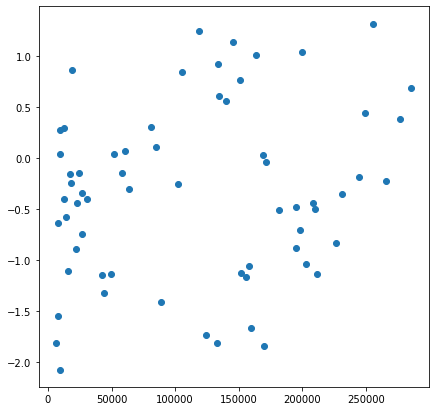

In [33]:
plotcorr(salmon['Japan'], pdo.pdo)

* What do you make of this result?

*************************

# 4. Salmon Population vs. Sea Surface Temperatures?

We believe that Alaska salmon live primarily in the Gulf of Alaska and East Bering Sea as adults.  It stands to reason that sea surface temperature in those areas should have an impact on salmon biomass.  Let's find out!

Correlation: 0.1680120272755104


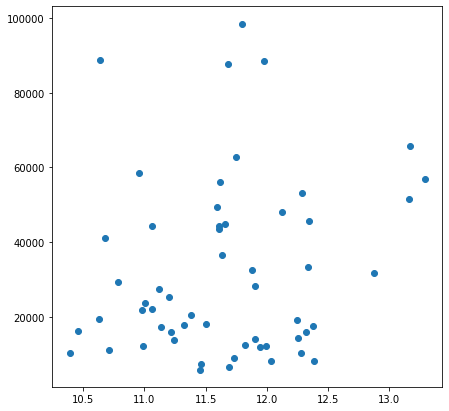

In [93]:
plotcorr(climate['Gulf of Alaska'], salmon['SEAK'])

Hmm, that's not much of an effect.

But wait... chum salmon spend 3-4 years at sea before returning to spawn (and be eaten by us).  Shouldn't the biomass we see on a year's salmon run depend on the AVERAGE temperature over the last 3-4 years, not just the temperature in the most recent year?  Let's find out!

Correlation: 0.43584285792181454


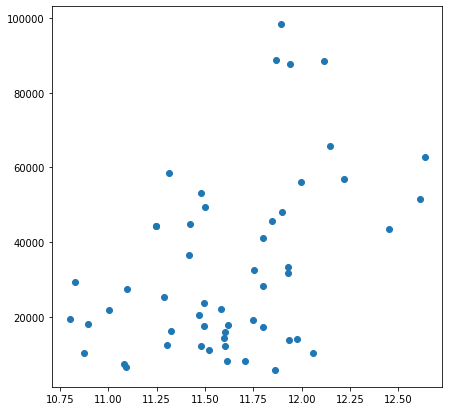

In [98]:
plotcorr(climate['Gulf of Alaska'].rolling(4).mean(), salmon['SEAK'])

This correlation is more in range of the dependence Kaeriyama et al (2014) found between sea surface temperature (SST) and measures of Hokkaido chum salmon in Japan, using their path model (Figure 6 p. 256).

* What happens if you "play" with the number of years for the rolling mean?  Can that be justified, based on known aspects of chum salmon biology?

* What about other salmon species?

* What about other pairs of region (from the salmon dataframe) and large marine ecosystem (from the climate dataframe)?

* What about other climate variables?  (Sea ice thickness, sea ice cover)

***********************

### Control: What does Non-Correlation Look Like?

We know that Alska chum salmon have nothing to do with Labrador - Newfoundland, and that the PDO does not affect the Atlantic Ocean.

* Would we expect chum salmon biomass to be correlated with the climate in Labrador - Newfoundland?  Why or why not?

Let's find out!



Correlation: 0.15927595850087783


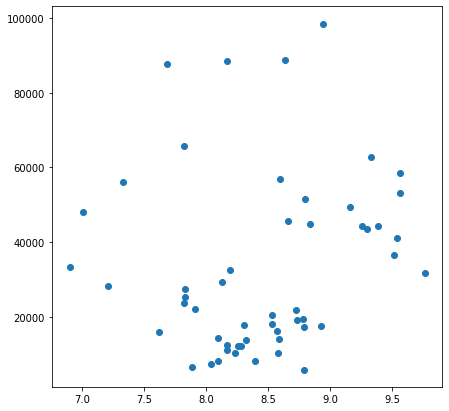

In [106]:
plotcorr(climate['Labrador - Newfoundland'].rolling(4).mean(), salmon['SEAK'])

*******************************

## 5. What about Washington Salmon?

We think that Washington chum salmon live in or near the *California Current* large marine ecosystem.  Let's look at how sea surface temperatures affect it.

* Based on the results from Alaska, do you expect biomass to *increase* or *decrease*?  Why or why not?

* Play around with this.  Try different regions, climate variables, etc.  What do you find?

Correlation: -0.11465344894607929


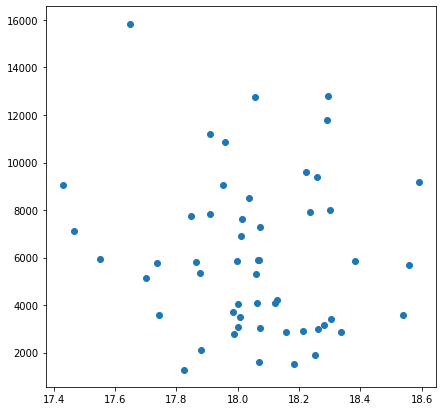

In [102]:
plotcorr(climate['California Current'].rolling(4).mean(), salmon['WA'])

Look at Kaeriyama et al (2014) p. 258 (Figure 8).

* Has your guess about what's going on in Washington changed?  If so, state your new "best understanding" of the result.

**********************************

# 6. Conclusions?

* What would you predict about the future of chum salmon (and other species of salmon) in:
  1. Washington?
  2. Southeast Alaska?
  3. Hokkaido, Japan (Japan's northernmost island)?
  4. Alaska's North Slope?

* What would you tell hatchery resource managers and people who depend on fish in Southeast Alaska?

* What else have you learned from playing around that was *not* in the original notebook?

* What else can you conclude about the present and future of Pacific salmon?